### **Seleccion de columnas**

In [12]:
#Libreria de manejo y tratamiento de datos

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Libreria de visualizacion de datos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Clustering

from sklearn.feature_selection import VarianceThreshold



In [2]:
df = pd.read_csv("Breast_GSE45827.csv") #Lectura del CSV con los datos referidos a subtipos de cáncer y Microarrays

In [3]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [4]:
#Comprobacion de columnas

df["1553394_a_at"]

0      4.233874
1      4.365289
2      3.968636
3      3.957113
4      4.172743
         ...   
146    9.434317
147    3.975292
148    4.504307
149    4.203309
150    4.206629
Name: 1553394_a_at, Length: 151, dtype: float64

In [6]:
# Primero, se debe quedar sólo con datos numéricos para calcular cuantiles

df_numerico = df.select_dtypes(include=["number"])

# Se calculan las varianzas

varianzas = df_numerico.var().sort_values(ascending=False)

# Este cuantil se usa en diferentes referencias bibliográficas con estudios previos, para analizar una muestra representativa y manejable

thresh = np.quantile(a=varianzas, q=0.9975)

thresh

4.954416101473023

In [7]:
# Hay que seleccionar sólo las numéricas, como en el anterior caso, para calcular varianzas

df_numerico = df.select_dtypes(include=["number"])

# Se calcula las varianzas

varianzas = df_numerico.var().sort_values(ascending=False)

# Luego el cuantil

thresh = np.quantile(a=varianzas, q=0.9975)

# Aquí se halla el umbral a partir del cuál trabajaremos con los datos obtenidos

vt = VarianceThreshold(threshold=thresh)

# Se transforma en el df original

df_var = vt.fit_transform(df_numerico)

# Este es el resultado de columnas que nos quedan

print(df_var.shape)


(151, 136)


In [8]:
df_var = pd.DataFrame(data = df_var,
                      columns = df_numerico.columns[vt.get_support()])

df_var

,samples,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,84.0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,85.0,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,87.0,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,90.0,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,91.0,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230.0,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,233.0,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,236.0,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,237.0,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [9]:
# Devuelve la columna tipo para poder, si se qusiera, segmentar por tipos de cáncer

df_var.insert(0, "type", df["type"])

In [10]:
df_var

,type,samples,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,basal,84.0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,basal,85.0,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,basal,87.0,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,basal,90.0,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,basal,91.0,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,luminal_B,230.0,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,luminal_B,233.0,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,luminal_B,236.0,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,luminal_B,237.0,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [107]:
#Se obtiene el csv de los microarrays con los que se trabajara, identificados como interesantes en observación

df_var.to_csv("genes_filtrados.csv", index=False)

In [108]:
# Se comienza el proceso de obtener un archivo sólo con la cabecera de las columnas para realizar posteriormente la búsqueda del gen correspondiente

columnas = df_var.columns

In [109]:
#Dataframe con las cabeceras de columnas

df_nombres_columnas = pd.DataFrame(columnas, columns=["Columnas"])

In [110]:
#Excel con la información

df_nombres_columnas.to_excel('microarrays.xlsx', index=False)

In [22]:
#Búsqueda de genes y completado el fichero, lo incorporamos

df_nombre_genes = pd.read_excel("microarrays-genes.xlsx")

df_nombre_genes

,type,Gen
0,1553394_a_at,TP53
1,1553434_at,CYP4Z1
2,1553602_at,ERBB2
3,1555745_a_at,TP53
4,1555778_a_at,VEGFA
...,...,...
130,240304_s_at,EP300
131,242579_at,APP
132,243241_at,TP53
133,37892_at,TP53


In [24]:
#Se requiere sustituir las columnas por el gen al que corresponde cada microarray, creamos la variable map_genes

map_genes = {x : y for x, y in zip(df_nombre_genes["type"].values, df_nombre_genes["Gen"].values)}

map_genes

{'1553394_a_at': 'TP53',
 '1553434_at': 'CYP4Z1',
 '1553602_at': 'ERBB2',
 '1555745_a_at': 'TP53',
 '1555778_a_at': 'VEGFA',
 '1558034_s_at': 'trnW-CCA-cp',
 '200795_at': 'TP53',
 '201525_at': 'APOE',
 '201744_s_at': 'CFTR',
 '201852_x_at': 'TGFB1',
 '202018_s_at': 'TLR4',
 '202036_s_at': 'AKT1',
 '202037_s_at': 'AKT1',
 '202376_at': 'APOE',
 '202403_s_at': 'EGFR',
 '202404_s_at': 'EGFR',
 '202917_s_at': 'TP53',
 '203290_at': 'HLA-DRB1',
 '203535_at': 'EGFR',
 '203757_s_at': 'EGFR',
 '203915_at': 'TNF',
 '203963_at': 'ESR1',
 '203980_at': 'TNF',
 '204304_s_at': 'TGFB1',
 '204320_at': 'APP',
 '204351_at': 'TP53',
 '204475_at': 'TP53',
 '204533_at': 'TNF',
 '204602_at': 'EGFR',
 '204623_at': 'VEGFA',
 '204667_at': 'TP53',
 '204846_at': 'trnW-CCA-cp',
 '204913_s_at': 'TP53',
 '205009_at': 'TP53',
 '205030_at': 'SNCA',
 '205044_at': 'EGFR',
 '205048_s_at': 'MYC',
 '205081_at': 'SOD1',
 '205225_at': 'TP53',
 '205239_at': 'EGFR',
 '205242_at': 'TNF',
 '205440_s_at': 'STAT3',
 '205509_at': 'N

In [25]:
# Se itera y sustituye, usando el diccionario previo, cada valor de microarray por el gen que corresponde. 
# Se obtiene una tabla final donde podemos ver genes y tipos de cáncer.

df_var.columns = [map_genes[x] if x in map_genes.keys() else x for x in df_var.columns]

df_var

,type,samples,TP53,CYP4Z1,ERBB2,TP53,VEGFA,trnW-CCA-cp,TP53,APOE,...,CTBP2,TP53,LINC00993,NR3C1,TGFB1,EP300,APP,TP53,TP53,TP53
0,basal,84.0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,basal,85.0,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,basal,87.0,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,basal,90.0,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,basal,91.0,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,luminal_B,230.0,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,luminal_B,233.0,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,luminal_B,236.0,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,luminal_B,237.0,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [61]:
# En esta parte se va a crear una columna de countplot a partir de los counts que superen el valor de 2

genes_relevantes = df_var_colcounts[df_var_colcounts >2]
genes_relevantes

df_genes_rel = pd.DataFrame(genes_relevantes, )
df_genes_rel

,count
TP53,34
EGFR,15
TGFB1,11
VEGFA,7
APP,7
MYC,6
TNF,4
BRCA1,3
trnW-CCA-cp,3


In [64]:
#Obtencion de un DataFrame con los Genes y los count de cada Gen

df_genes_rel["Gen"] = ['TP53', 'EGFR', 'TGFB1', 'VEGFA', "APP", "MYC", "TNF", "BRCA1", "trnW-CCA-cp"]
df_genes_rel.reset_index(drop=True, inplace=True)
df_genes_rel

,count,Gen
0,34,TP53
1,15,EGFR
2,11,TGFB1
3,7,VEGFA
4,7,APP
5,6,MYC
6,4,TNF
7,3,BRCA1
8,3,trnW-CCA-cp


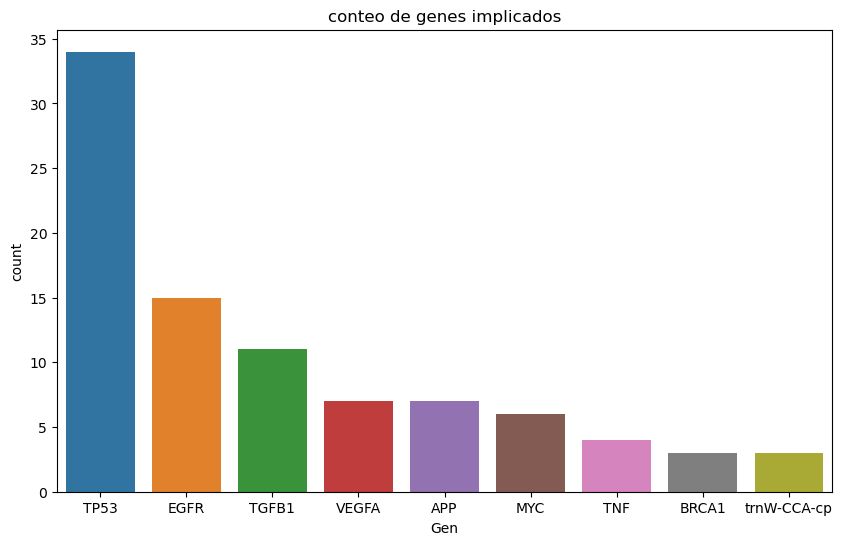

In [66]:
#Representacion Grafica del conteo de los genes

plt.figure(figsize = (10, 6))


sns.barplot(x= df_genes_rel["Gen"] , y = df_genes_rel["count"])



plt.title("conteo de genes implicados")
plt.show()